<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Первая-модель" data-toc-modified-id="Первая-модель-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Первая модель</a></span></li><li><span><a href="#Вторая-модель." data-toc-modified-id="Вторая-модель.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вторая модель.</a></span></li><li><span><a href="#Третья-модель" data-toc-modified-id="Третья-модель-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Третья модель</a></span></li><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Подготовка данных

In [2]:
data = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [4]:
data_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [5]:
pd.set_option('display.max_columns', None)
data.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [7]:
pd.set_option('display.max_columns', None)
data_train.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [9]:
pd.set_option('display.max_columns', None)
data_test.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [11]:
display(data.shape)
display(data_train.shape)
display(data_test.shape)

(19439, 87)

(14579, 87)

(4860, 53)

Нам представлены данные в виде трёх выборок, каждая из который играет свою роль. 

Датафрейм data содержит обучающую и тестовую выборки со всеми признаками. data_train и data_test обучающая и тестовые выборки, соответственно.

Для начала нам нужно убедиться в том, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`.

In [12]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Name: rougher.output.recovery, Length: 14579, dtype: float64

In [13]:
# создадим переменные для расчета эффективности обогащения на этапе rougher
C = data_train['rougher.output.concentrate_au'] 
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [14]:
# произведем рассчеты по формуле
R = (C * (F - T))* 100 / (F * (C - T)) 
R

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64

In [15]:
# рассчитаем MAE
mae_for_recovery = mean_absolute_error(data_train['rougher.output.recovery'], R)
mae_for_recovery

1.1181885454685472e-14

Значение `MAE` 1.1e-14 , а это значит что эффективность обогащения в столбце `rougher.output.recovery` рассчитана правильно.

Далее нам требуется проанализировать признаки, недоступные в тестовой выборке.

In [17]:
a = data_train.columns.tolist()
b = data_test.columns.tolist()
list(set(a).difference(b))

['rougher.output.recovery',
 'rougher.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_pb',
 'rougher.output.tail_au',
 'final.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'final.output.tail_pb',
 'final.output.concentrate_au',
 'final.output.tail_sol',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.tail_sol',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_ag',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.concentrate_ag',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'final.output.recovery',
 'final.output.tail_au',
 'primary_cleaner.output.tail_au',
 'final.output.tail_ag',
 'rougher.calculation.floatba

В тестовой выборке из 34 пропущенных признака (9 пропущенных признаков этапа final, 8 primary_cleaner, 9 rougher, 4 secondary_cleaner): 30 относятся к параметрам продукта и только 4 к расчетным характеристикам.


То есть нет типа признака output - это целевые признаки (отсутствуют данные по всем этапам обработки сырья):


1. на всех этапах отсутствует информация о хвостовых частях,


2. на всех этапах, кроме повторной очистки отсутствует информация о доле металлов,


3. на финальном этапе и этапе флотации отсутствуют признаки эффективности обогащения,


4. отсутствуют данные о некоторых реагентах на этапе флотации.


В тестовой выборке отсутствуют типы признака calculation для этапа rougher (расчетная характеристика), скорее всего эти данные рассчитываются позднее и не доступны во время процесса.

**Признаки относятся к рассчётным характеристикам и финальным характеристикам этапов, их отсутствие в тестовой выборке вполне ожидаемо.**

Далее данные требуется предобработать. Для начала узнаем есть ли дубликаты.

In [18]:
data_train.duplicated().sum()

0

In [19]:
data_test.duplicated().sum()

0

Дубликатов нет. Мы знаем, что в данных присутствуют пропуски. Найдем их количество.

In [20]:
data_train.isna().sum().sum()

3050

In [21]:
data_test.isna().sum().sum()

375

Для последующего обучения модели нам нужно обработать столбцы в выборках

Сначала нам нужно в обучающей выборке избавиться от всех столбцов, которые отсутствуют в тестовой выборке.

In [22]:
data_train = data_train.drop(list(set(a).difference(b)), axis=1)

In [23]:
data_train.shape

(14579, 53)

In [24]:
data_test.shape

(4860, 53)

Далее добавим в каждую выборку целевые признаки из общей выборки, которые добавятся по индексу.

In [25]:
data_train = data_train.merge(data[['rougher.output.recovery', 'date']], on = 'date')                             
data_train = data_train.merge(data[['final.output.recovery', 'date']], on = 'date') 

In [26]:
data_train.shape

(14579, 55)

In [27]:
data_test = data_test.merge(data[['rougher.output.recovery', 'date']], on = 'date')    
data_test = data_test.merge(data[['final.output.recovery', 'date']], on = 'date')    

In [28]:
data_test.shape

(4860, 55)

In [29]:
# КОД РЕВЬЮЕРА
data_test[['date', 'rougher.output.recovery', 'final.output.recovery']].head()

,date,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,89.514960,70.281454
1,2017-12-09 15:59:59,89.858126,65.523246
2,2017-12-09 16:59:59,91.816623,74.817644
3,2017-12-09 17:59:59,88.478959,63.082720
4,2017-12-09 18:59:59,89.230316,74.463380


In [30]:
# КОД РЕВЬЮЕРА
data[['date', 'rougher.output.recovery', 'final.output.recovery']].head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


Удалим столбец `date` который никак не поможет в расчетах.

In [31]:
data_train = data_train.drop(['date'], axis=1)

In [32]:
data_test = data_test.drop(['date'], axis=1)

Так как мы знаем, что соседние по времени параметры часто похожи, то вместо удаления пропусков заменим их соседними значениями.

In [33]:
data_train = data_train.bfill()

In [34]:
data_test = data_test.bfill()

Создадим для обучения модели подвыборки с параметрами и таргетом.

In [35]:
# параметры
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# целевой признак
target_train = data_train['rougher.output.recovery']
target_train1 = data_train['final.output.recovery']

In [36]:
# параметры
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# целевой признак
target_test = data_test['rougher.output.recovery']
target_test1 = data_test['final.output.recovery']

In [37]:
print('Размеры обучающей выборки:')
print(features_train.shape)
print(target_train.shape)
print(target_train1.shape)
print()
print('Размеры тестовой выборки:')
print(features_test.shape)
print(target_test.shape)
print(target_test1.shape)
print()

Размеры обучающей выборки:
(14579, 52)
(14579,)
(14579,)

Размеры тестовой выборки:
(4860, 52)
(4860,)
(4860,)



## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Удалим аномальные значения.

In [38]:
# создадим функцию для визуализации данных на различных этапах
# также данная функция выявит и отсеет аномальные значения

def visual (column, xname, yname):
    clean=[]
    Q1= data[column].quantile(0.25)
    Q3= data[column].quantile(0.75)
    IQR = Q3 - Q1
    Low = Q1 - 1.5*IQR
    High = Q3 + 1.5*IQR
    for i in data[column]:
        if i >= Low and i <= High:
            clean.append(i)         
    sns.histplot(data=clean, bins=100);
    plt.xlabel(xname);
    plt.ylabel(yname);
    plt.show()    
    return print(f'Строк в очищенных данных: {len(clean)}, строк изначально: {len(data[column])}')    

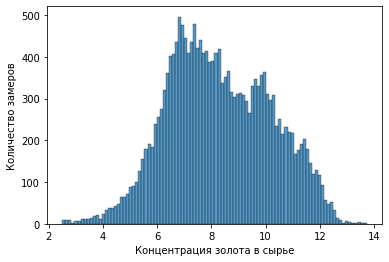

Строк в очищенных данных: 19344, строк изначально: 19439


In [39]:
visual('rougher.input.feed_au','Концентрация золота в сырье','Количество замеров')

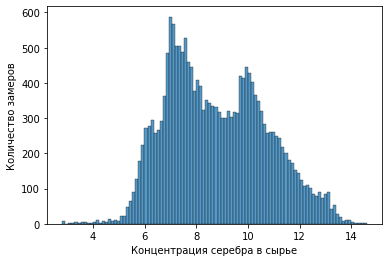

Строк в очищенных данных: 19419, строк изначально: 19439


In [40]:
visual('rougher.input.feed_ag','Концентрация серебра в сырье','Количество замеров')

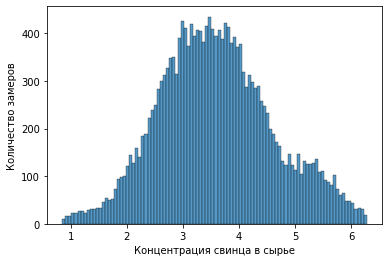

Строк в очищенных данных: 19149, строк изначально: 19439


In [41]:
visual('rougher.input.feed_pb','Концентрация свинца в сырье','Количество замеров')

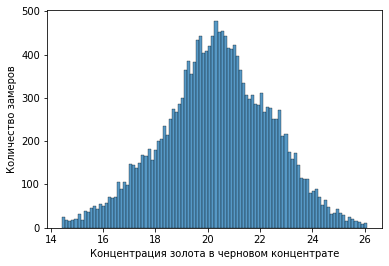

Строк в очищенных данных: 18584, строк изначально: 19439


In [42]:
visual('rougher.output.concentrate_au','Концентрация золота в черновом концентрате','Количество замеров')

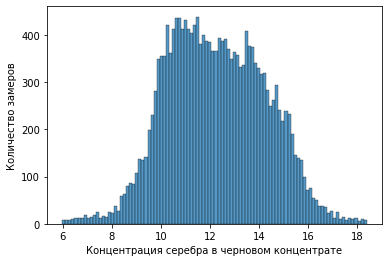

Строк в очищенных данных: 18847, строк изначально: 19439


In [43]:
visual('rougher.output.concentrate_ag','Концентрация серебра в черновом концентрате','Количество замеров')

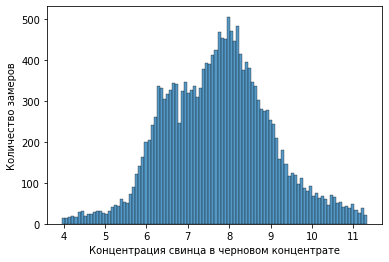

Строк в очищенных данных: 18574, строк изначально: 19439


In [44]:
visual('rougher.output.concentrate_pb','Концентрация свинца в черновом концентрате','Количество замеров')

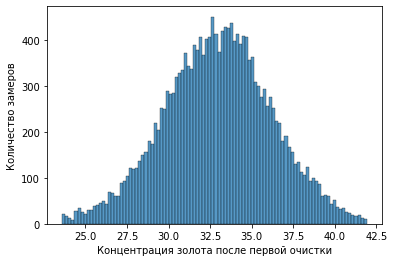

Строк в очищенных данных: 18572, строк изначально: 19439


In [45]:
visual('primary_cleaner.output.concentrate_au','Концентрация золота после первой очистки','Количество замеров')

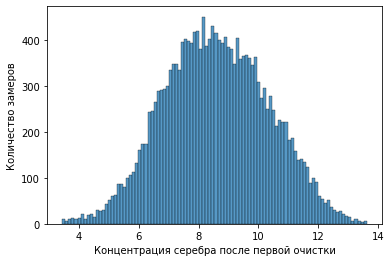

Строк в очищенных данных: 19005, строк изначально: 19439


In [46]:
visual('primary_cleaner.output.concentrate_ag','Концентрация серебра после первой очистки','Количество замеров')

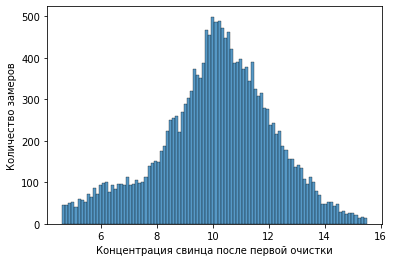

Строк в очищенных данных: 18497, строк изначально: 19439


In [47]:
visual('primary_cleaner.output.concentrate_pb','Концентрация свинца после первой очистки','Количество замеров')

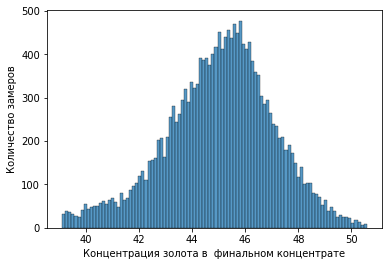

Строк в очищенных данных: 18202, строк изначально: 19439


In [48]:
visual('final.output.concentrate_au','Концентрация золота в  финальном концентрате','Количество замеров')

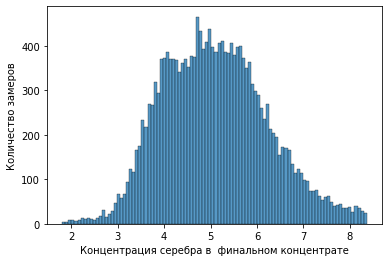

Строк в очищенных данных: 18834, строк изначально: 19439


In [49]:
visual('final.output.concentrate_ag','Концентрация серебра в  финальном концентрате','Количество замеров')

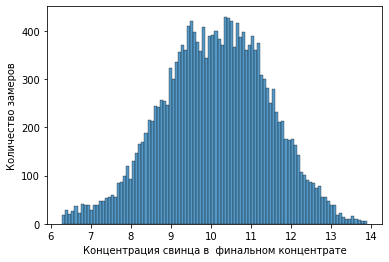

Строк в очищенных данных: 18962, строк изначально: 19439


In [50]:
visual('final.output.concentrate_pb','Концентрация свинца в  финальном концентрате','Количество замеров')

Судя по данным гистограммам, с каждым этапом концентрация золота увеличивается, в то время как концентрация серебра и свинца понижается. Это объяснимо тем, что компания занимается увеличением коэффициента восстановления золота из золотосодержащей руды.

Далее нам требуется сравнить распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

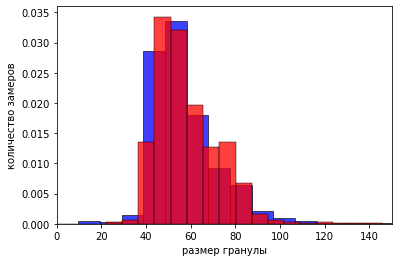

In [51]:
sns.histplot(data=data_train['rougher.input.feed_size'], bins=50, color='blue', stat='density', common_norm=False);   
sns.histplot(data=data_test['rougher.input.feed_size'], bins=50, color='red', stat='density', common_norm=False);
sns.set(rc={'figure.figsize':(10.7,6.2)})
plt.xlabel('размер гранулы');
plt.ylabel('количество замеров');
plt.xlim(0, 150);
plt.show()

Заметно, что в тестовой выборке размеры гранул в большинстве своем около 50, когда в обучающей размеры варьируются 40-60. В целом, распределения похожи. Они нормальные, с пиком значения размера гранулы примерно в 50.

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [53]:
print(data['rougher.input.feed_au'].sum().round(2))
print(data['rougher.input.feed_ag'].sum().round(2))
print(data['rougher.input.feed_pb'].sum().round(2))

160684.67
170964.59
69583.37


In [54]:
print(data['rougher.output.concentrate_au'].sum().round(2))
print(data['rougher.output.concentrate_ag'].sum().round(2))
print(data['rougher.output.concentrate_pb'].sum().round(2))

384347.91
233166.13
147858.33


In [55]:
print(data['primary_cleaner.output.concentrate_au'].sum().round(2))
print(data['primary_cleaner.output.concentrate_ag'].sum().round(2))
print(data['primary_cleaner.output.concentrate_pb'].sum().round(2))

624369.02
164111.97
189936.0


In [56]:
print(data['final.output.concentrate_au'].sum().round(2))
print(data['final.output.concentrate_ag'].sum().round(2))
print(data['final.output.concentrate_pb'].sum().round(2))

856803.34
100464.73
193969.76


1. После каждого этапа заметно большое увеличение концентрации золота. 
2. В сырье концентрация серебра изначально даже выше, чем золота. После первой стадии флотации, концентрация серебра увеличивается, но уже не превосходит золото. После стадии очистки и к финальному концентрату серебра в сплаве становится все меньше.
3. Концентрация свинца с каждым этапом становится выше, то есть в финальном концентрате количество свинца в составе сплава становится выше, чем серебра. 

## Модель

Напишем функцию для вычисления sMAPE.

In [57]:
# с помощью данной функции в последующих расчетах мы сможем рассчитать итоговое sMAPE
def smape(act,forc):
    return 100/len(act) * np.sum(2 * np.abs(forc - act) / (np.abs(act) + np.abs(forc)))

In [58]:
custom_score=make_scorer(smape, greater_is_better=False)

Обучим разные модели и оценим их качество кросс-валидацией. Затем выберем лучшую модель и проверим её на тестовой выборке.

### Первая модель

In [60]:
# создадим функцию, которая будет подбирать гиперпараметры для указанной ей модели
# затем данная функция будет проводить кросс-валидацию по метрике sMAPE

def score(model_name, params, features, target):
    model = model_name
    parametrs = params
    grid = GridSearchCV(model, parametrs, scoring=custom_score, cv=3) 
    grid.fit(features, target)    
    print('smape модели:', -grid.best_score_)
    print('лучшие параметры:', grid.best_estimator_)

In [61]:
# первой опробуем модель линейной регрессии

# для чернового концентрата
score(LinearRegression(), {"fit_intercept": [True, False],"n_jobs": [-1]}, features_train, target_train)

smape модели: 14.906695239550137
лучшие параметры: LinearRegression(n_jobs=-1)


In [62]:
# для финального концентрата
score(LinearRegression(n_jobs=-1), { "fit_intercept": [True, False]}, features_train, target_train1)

smape модели: 13.071848749536898
лучшие параметры: LinearRegression(n_jobs=-1)


### Вторая модель.

In [63]:
# далее, дерево решений

# для чернового концентрата 
score(DecisionTreeRegressor(),{'max_depth': range (1, 13, 2),                          
                          'min_samples_leaf': range (1, 11),                          
                          'random_state': [12345]}, 
                           features_train, target_train)

smape модели: 13.837823227732047
лучшие параметры: DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=12345)


In [64]:
# для финального концентрата
score(DecisionTreeRegressor(),{'max_depth': range (1, 13, 2),                          
                          'min_samples_leaf': range (1, 11),                          
                          'random_state': [12345]},    
                           features_train, target_train1)

smape модели: 11.341116920076713
лучшие параметры: DecisionTreeRegressor(max_depth=1, random_state=12345)


### Третья модель

In [65]:
# и случайный лес

# для данной модели подбором гиперпараметров займется RandomizedSearchCV
# для этого изменим функцию score 

def score(model_name, params, features, target):
    model = model_name
    parametrs = params
    random = RandomizedSearchCV(model, parametrs, n_iter=25, scoring=custom_score, cv=3)
    random.fit(features, target)     
    print('smape модели:', -random.best_score_.mean())
    print('лучшие параметры:', random.best_estimator_)

In [66]:
%%time

# для чернового концентрата

score(RandomForestRegressor(),{'max_depth': range (5, 10, 1),                          
                          'n_estimators': range (50, 100, 10),                          
                          'random_state': [12345]}, 
                           features_train, target_train)

smape модели: 13.475439923519415
лучшие параметры: RandomForestRegressor(max_depth=6, n_estimators=90, random_state=12345)
CPU times: user 18min 34s, sys: 1.86 s, total: 18min 36s
Wall time: 18min 43s


In [67]:
%%time

# для финального концентрата

score(RandomForestRegressor(),{'max_depth': range (5, 10, 1),                          
                          'n_estimators': range (50, 100, 10),                          
                          'random_state': [12345]}, 
                           features_train, target_train1)

smape модели: 11.868607598105848
лучшие параметры: RandomForestRegressor(max_depth=5, n_estimators=80, random_state=12345)
CPU times: user 18min 40s, sys: 1.33 s, total: 18min 41s
Wall time: 18min 48s


**Лучшей моделью оказалось дерево решений. Используем ее для предсказания.**

### Проверка модели

In [68]:
# для чернового концентрата 

model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=6, random_state=12345)
model.fit(features_test, target_test)

predicts = model.predict(features_test)  
smape(target_test, predicts)

3.661985292079489

In [69]:
# для финального концентрата 

model = DecisionTreeRegressor(max_depth=1, random_state=12345)
model.fit(features_test, target_test1)

predicts1 = model.predict(features_test) 
smape(target_test1, predicts1)

8.59809574956562

Теперь, используя функцию для вычисления итоговой sMAPE, выведем результат.

In [70]:
print('Итоговое sMAPE для прототипа модели машинного обучения:', 
     (0.25 * smape(target_test, predicts) + 0.75 * smape(target_test1, predicts1)).round(2))

Итоговое sMAPE для прототипа модели машинного обучения: 7.36


Проверим наш прототип модели на адекватность. Сравним полученное значение метрики с результатом, который даст константная модель.

In [71]:
# создаём модель DummyRegressor,
# которая предсказывает все значения
# как среднее из массива features_test


# для чернового концентрата 

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_test, target_test)

predict_for_check = dummy_regr.predict(features_test)
smape(target_test, predict_for_check)

5.896798901317001

In [72]:
# для финального концентрата 

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_test, target_test1)

predict_for_check1 = dummy_regr.predict(features_test)
smape(target_test1, predict_for_check1)

9.133313373909653

In [73]:
print('Итоговое sMAPE для константной модели:', 
     (0.25 * smape(target_test, predict_for_check) + 0.75 * smape(target_test1, predict_for_check1)).round(2))

Итоговое sMAPE для константной модели: 8.32


**Метрика sMAPE для нашей модели лучше, чем для константной, соответственно можно считать создание прототипа модели успешным**.

## Общий вывод

В результате исследования был проведен анализ и сделаны следующие выводы.

1. С каждым этапом обработки концентрация золота увеличивается, в то время как концентрация серебра и свинца понижается. Это объяснимо тем, что компания занимается увеличением коэффициента восстановления золота из золотосодержащей руды.
2. 
- После каждого этапа заметно большое увеличение концентрации золота.
- В сырье концентрация серебра изначально даже выше, чем золота. После первой стадии флотации, концентрация серебра увеличивается, но уже не превосходит золото. После стадии очистки и к финальному концентрату серебра в сплаве становится все меньше.
- Концентрация свинца с каждым этапом становится выше, то есть в финальном концентрате количество свинца в составе сплава становится выше, чем серебра.


Лучшей моделью для предсказания концентрации золота в черновом концентрате оказалась **DecisionTreeRegressor(max_depth=5, min_samples_leaf=6, random_state=12345)**. sMAPE = 3.66

Лучшей моделью для предсказания концентрации золота в финальном концентрате оказалась **DecisionTreeRegressor(max_depth=1, random_state=12345)**. sMAPE = 8.59


**Значение итогового  sMAPE =  7.36.**